In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Обработка данных

Краткое описание данных:
* SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
* MSSubClass: The building class
* MSZoning: The general zoning classification
* LotFrontage: Linear feet of street connected to property
* LotArea: Lot size in square feet
* Street: Type of road access
* Alley: Type of alley access
* LotShape: General shape of property
* LandContour: Flatness of the property
* Utilities: Type of utilities available
* LotConfig: Lot configuration
* LandSlope: Slope of property
* Neighborhood: Physical locations within Ames city limits
* Condition1: Proximity to main road or railroad
* Condition2: Proximity to main road or railroad (if a second is present)
* BldgType: Type of dwelling
* HouseStyle: Style of dwelling
* OverallQual: Overall material and finish quality
* OverallCond: Overall condition rating
* YearBuilt: Original construction date
* YearRemodAdd: Remodel date
* RoofStyle: Type of roof
* RoofMatl: Roof material
* Exterior1st: Exterior covering on house
* Exterior2nd: Exterior covering on house (if more than one material)
* MasVnrType: Masonry veneer type
* MasVnrArea: Masonry veneer area in square feet
* ExterQual: Exterior material quality
* ExterCond: Present condition of the material on the exterior
* Foundation: Type of foundation
* BsmtQual: Height of the basement
* BsmtCond: General condition of the basement
* BsmtExposure: Walkout or garden level basement walls
* BsmtFinType1: Quality of basement finished area
* BsmtFinSF1: Type 1 finished square feet
* BsmtFinType2: Quality of second finished area (if present)
* BsmtFinSF2: Type 2 finished square feet
* BsmtUnfSF: Unfinished square feet of basement area
* TotalBsmtSF: Total square feet of basement area
* Heating: Type of heating
* HeatingQC: Heating quality and condition
* CentralAir: Central air conditioning
* Electrical: Electrical system
* 1stFlrSF: First Floor square feet
* 2ndFlrSF: Second floor square feet
* LowQualFinSF: Low quality finished square feet (all floors)
* GrLivArea: Above grade (ground) living area square feet
* BsmtFullBath: Basement full bathrooms
* BsmtHalfBath: Basement half bathrooms
* FullBath: Full bathrooms above grade
* HalfBath: Half baths above grade
* Bedroom: Number of bedrooms above basement level
* Kitchen: Number of kitchens
* KitchenQual: Kitchen quality
* TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
* Functional: Home functionality rating
* Fireplaces: Number of fireplaces
* FireplaceQu: Fireplace quality
* GarageType: Garage location
* GarageYrBlt: Year garage was built
* GarageFinish: Interior finish of the garage
* GarageCars: Size of garage in car capacity
* GarageArea: Size of garage in square feet
* GarageQual: Garage quality
* GarageCond: Garage condition
* PavedDrive: Paved driveway
* WoodDeckSF: Wood deck area in square feet
* OpenPorchSF: Open porch area in square feet
* EnclosedPorch: Enclosed porch area in square feet
* 3SsnPorch: Three season porch area in square feet
* ScreenPorch: Screen porch area in square feet
* PoolArea: Pool area in square feet
* PoolQC: Pool quality
* Fence: Fence quality
* MiscFeature: Miscellaneous feature not covered in other categories
* MiscVal: $Value of miscellaneous feature
* MoSold: Month Sold
* YrSold: Year Sold
* SaleType: Type of sale
* SaleCondition: Condition of sale

In [2]:
train = pd.read_csv('train_price.csv')
labels = train["SalePrice"]
train = train.drop('SalePrice', axis=1)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(train, labels, test_size=0.33, random_state=142)

In [4]:
nans=pd.isnull(X_train).sum()
nans[nans>0]#отбросим столбцы, где более половины NaN

LotFrontage     173
Alley           917
MasVnrType        5
MasVnrArea        5
BsmtQual         24
BsmtCond         24
BsmtExposure     25
BsmtFinType1     24
BsmtFinType2     25
Electrical        1
FireplaceQu     464
GarageType       63
GarageYrBlt      63
GarageFinish     63
GarageQual       63
GarageCond       63
PoolQC          975
Fence           799
MiscFeature     945
dtype: int64

In [5]:
X_train=X_train.drop(["Id","Alley", "Fence", "MiscFeature", "PoolQC", "FireplaceQu"], axis=1)
X_test=X_test.drop(["Id","Alley", "Fence", "MiscFeature", "PoolQC", "FireplaceQu"], axis=1)

In [6]:
all_columns = X_train.columns.values
non_categorical = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
                   "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
                   "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
                   "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                   "ScreenPorch","PoolArea", "MiscVal"]

catigorial = [value for value in all_columns if value not in non_categorical]

In [7]:
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(X_train[catigorial])

features_name = enc.get_feature_names_out(catigorial)
X_train[features_name] =  enc.transform(X_train[catigorial]).toarray()
X_train = X_train.drop(catigorial, axis=1)

X_test[features_name] = enc.transform(X_test[catigorial]).toarray()
X_test = X_test.drop(catigorial, axis=1)

C:\Users\Виктория\AppData\Local\Temp\ipykernel_16408\2013532629.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[features_name] =  enc.transform(X_train[catigorial]).toarray()
C:\Users\Виктория\AppData\Local\Temp\ipykernel_16408\2013532629.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train[features_name] =  enc.transform(X_train[catigorial]).toarray()
C:\Users\Виктория\AppData\Local\Temp\ipykernel_16408\2013532629.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling

C:\Users\Виктория\AppData\Local\Temp\ipykernel_16408\2013532629.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[features_name] = enc.transform(X_test[catigorial]).toarray()
C:\Users\Виктория\AppData\Local\Temp\ipykernel_16408\2013532629.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test[features_name] = enc.transform(X_test[catigorial]).toarray()
C:\Users\Виктория\AppData\Local\Temp\ipykernel_16408\2013532629.py:8: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

In [8]:
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent') #NaN остались, заполняем модой
X_train = imp.fit_transform(X_train)
X_test = imp.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\impute\_base.py:49: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(array)


In [9]:
X_train_clear, X_test_clear = X_train, X_test

# Sklearn

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [11]:
model = LinearRegression()
model.fit(X_train_clear, y_train)
print(f"R2 на train: {model.score(X_train_clear, y_train)}")
print(f"R2 на test: {model.score(X_test_clear, y_test)}")

R2 на train: 0.9686307493617006
R2 на test: -7177588754.525878


In [12]:
pca = PCA(whiten=True)
pca.fit(X_train)
variance = pd.DataFrame(pca.explained_variance_ratio_)
np.cumsum(pca.explained_variance_ratio_)

array([0.03569472, 0.05435928, 0.06931055, 0.08290124, 0.09608718,
       0.10812496, 0.11818329, 0.12772352, 0.1362992 , 0.14468051,
       0.15242729, 0.15991319, 0.16710419, 0.17399615, 0.18082652,
       0.1874347 , 0.19401308, 0.20044118, 0.20677373, 0.21298901,
       0.21914601, 0.22525541, 0.23130367, 0.23722317, 0.24311407,
       0.24887713, 0.25459587, 0.26024649, 0.26581225, 0.27134342,
       0.27680929, 0.28223077, 0.28762031, 0.29295578, 0.29823408,
       0.30346352, 0.30866129, 0.3138337 , 0.31895451, 0.32398727,
       0.32901605, 0.33399143, 0.33893502, 0.3438482 , 0.34873417,
       0.35359265, 0.35837261, 0.36313367, 0.36786197, 0.3725843 ,
       0.37724819, 0.38190399, 0.38655018, 0.39117112, 0.39574943,
       0.40029921, 0.4048296 , 0.40933123, 0.41380887, 0.4182745 ,
       0.42271317, 0.42713333, 0.43151926, 0.43586145, 0.4401857 ,
       0.44447483, 0.44874526, 0.45300549, 0.45724117, 0.46144746,
       0.4656353 , 0.46977889, 0.47390855, 0.47798507, 0.48205

какую долю вариации объясняют наши компоненты?

In [13]:
np.where(np.cumsum(pca.explained_variance_ratio_) == 1.) #не показывает, т.к. примерно равно 1

(array([], dtype=int64),)

In [44]:
pca = PCA(n_components=30, whiten=True) #переобучим модель
pca = pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

ValueError: n_components=30 must be between 0 and min(n_samples, n_features)=18 with svd_solver='full'

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
print(f"R2 на train: {model.score(X_train, y_train)}")
print(f"R2 на test: {model.score(X_test, y_test)}")

# PCA по шагам

Реализовать PCA по шагам (слайд 12 презентации) самостоятельно. Применить к данным, которые мы смотрели выше. Посмотрить модель линейной регрессии, сравнить качество модели.

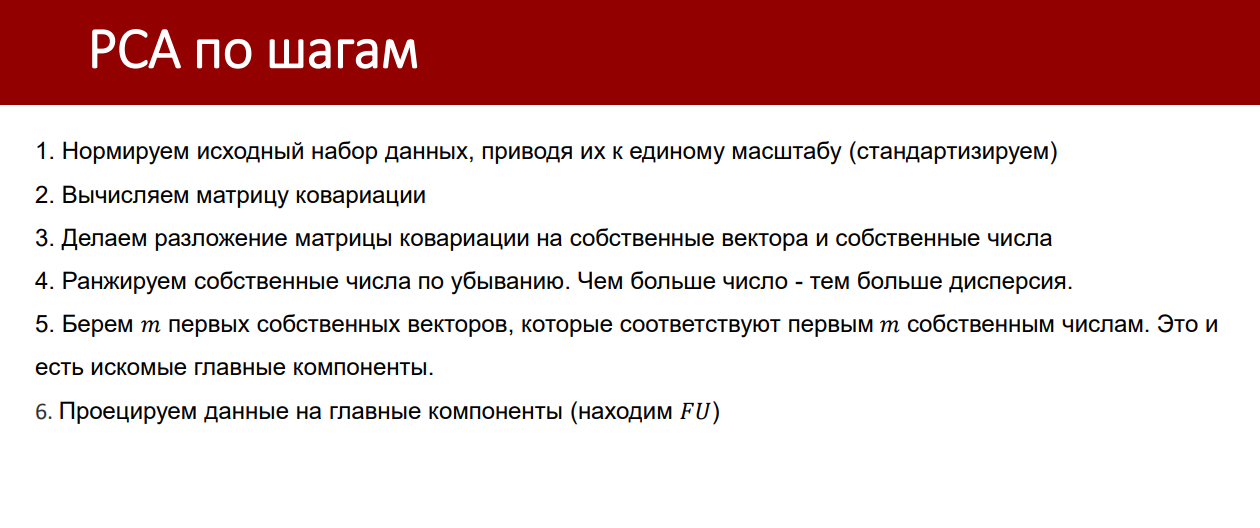

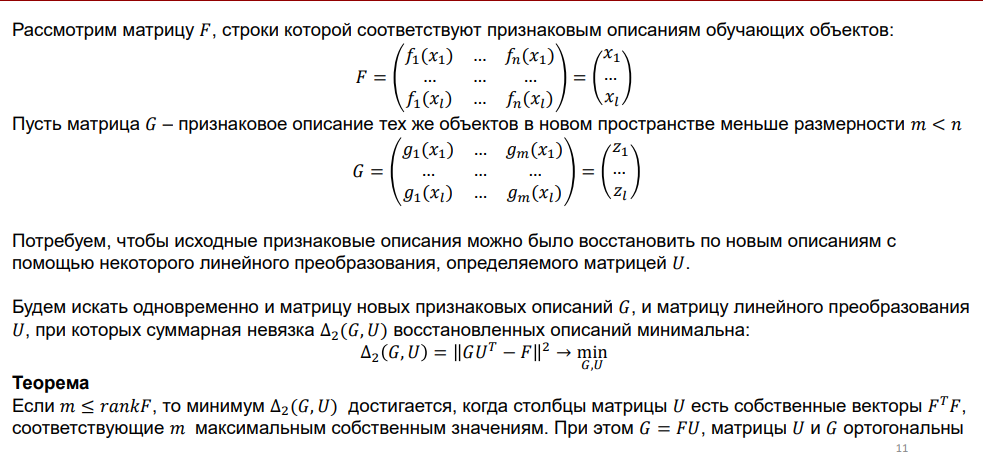

Собственные векторы это и есть компоненты. F*U, где U - . Чем выше собственное значение, тем важнее компонента

In [16]:
X_train, X_test = X_train_clear, X_test_clear

In [17]:
scaler = StandardScaler()
scaler.fit(X_train) #применили к train, именно его стд и среднее потом будем вычитать!!!
X_train = pd.DataFrame(scaler.transform(X_train), columns=scaler.get_feature_names_out())
X_test = pd.DataFrame(scaler.transform(X_test), columns=scaler.get_feature_names_out())

In [18]:
cov = np.cov(X_train, rowvar=False) #переменные не строчки, а столбцы

In [19]:
cov

array([[ 1.00102354,  0.27817735,  0.2227617 , ...,  0.01228107,
        -0.08504603,  0.15968202],
       [ 0.27817735,  1.00102354,  0.12314347, ..., -0.01493036,
         0.00762697,  0.02192589],
       [ 0.2227617 ,  0.12314347,  1.00102354, ..., -0.00604427,
        -0.10207451,  0.18212337],
       ...,
       [ 0.01228107, -0.01493036, -0.00604427, ...,  1.00102354,
        -0.24716213, -0.03766363],
       [-0.08504603,  0.00762697, -0.10207451, ..., -0.24716213,
         1.00102354, -0.69030935],
       [ 0.15968202,  0.02192589,  0.18212337, ..., -0.03766363,
        -0.69030935,  1.00102354]])

In [20]:
eigenvalues, eigenvectors = np.linalg.eig(cov)

In [21]:
eigenvalues, eigenvectors = np.real(eigenvalues), np.real(eigenvectors)

In [22]:
eigenvalues[:10]

array([21.97471926, 11.4904583 ,  9.20443957,  8.36682826,  8.11765542,
        7.41081095,  6.19220482,  5.87324469,  5.27944265,  5.15978007])

In [23]:
eigenvectors

array([[ 5.74905596e-02,  1.17732743e-02, -7.14527964e-02, ...,
        -2.02842213e-16, -2.02842213e-16,  2.21744461e-16],
       [ 2.50251930e-02,  4.45249041e-02, -7.38317366e-02, ...,
        -2.02832700e-15, -2.02832700e-15,  1.87681917e-15],
       [ 9.12517388e-02,  3.08636215e-03, -6.03253721e-02, ...,
        -5.01266768e-18, -5.01266768e-18, -7.92539907e-17],
       ...,
       [-3.31616849e-03,  1.48594555e-02,  1.34073840e-03, ...,
        -7.99792293e-03, -7.99792293e-03,  8.25949698e-03],
       [-4.50163324e-02,  7.11139059e-02,  6.24312767e-02, ...,
        -2.68871502e-02, -2.68871502e-02,  2.77665011e-02],
       [ 9.25671991e-02, -8.62725365e-02, -4.84570425e-02, ...,
        -2.04858973e-02, -2.04858973e-02,  2.11558937e-02]])

In [36]:
U = eigenvectors[:, :30] #18 гуд
U

array([[ 5.74905596e-02,  1.17732743e-02, -7.14527964e-02, ...,
         1.44242146e-02,  2.32870415e-02, -2.19896533e-02],
       [ 2.50251930e-02,  4.45249041e-02, -7.38317366e-02, ...,
         6.39332697e-03,  1.42802955e-02, -5.66471371e-02],
       [ 9.12517388e-02,  3.08636215e-03, -6.03253721e-02, ...,
        -1.07579556e-02, -2.39981048e-02,  1.71631149e-02],
       ...,
       [-3.31616849e-03,  1.48594555e-02,  1.34073840e-03, ...,
         3.45404595e-03,  1.48647541e-02,  1.18275818e-02],
       [-4.50163324e-02,  7.11139059e-02,  6.24312767e-02, ...,
        -4.13970982e-02,  2.11021399e-02, -1.47683066e-02],
       [ 9.25671991e-02, -8.62725365e-02, -4.84570425e-02, ...,
         1.36100148e-02,  6.35170127e-06, -7.54843714e-03]])

In [37]:
X_train_pca = np.dot(X_train, U)

In [38]:
X_test_pca = np.dot(X_test, U)

In [39]:
model = LinearRegression()
model.fit(X_train_pca, y_train)

LinearRegression()

In [40]:
r2_train = model.score(X_train_pca, y_train)
r2_train

0.8153698116037462

In [41]:
r2_test = model.score(X_test_pca, y_test)
r2_test

0.8314353367556719

In [ ]:
#test побольше; лучше разбивать выборку на несколько подвыборок, кросс-валидация